# imports

In [1]:
from SEAM.utils import *
import SEAM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
Using TensorFlow backend.


# settings

In [2]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# load

### load raw and segmented data from data/process/

In [3]:
a = SEAM.datasets.load_dataset_raw('20190103_lung3_filter')

### display raw ion image data

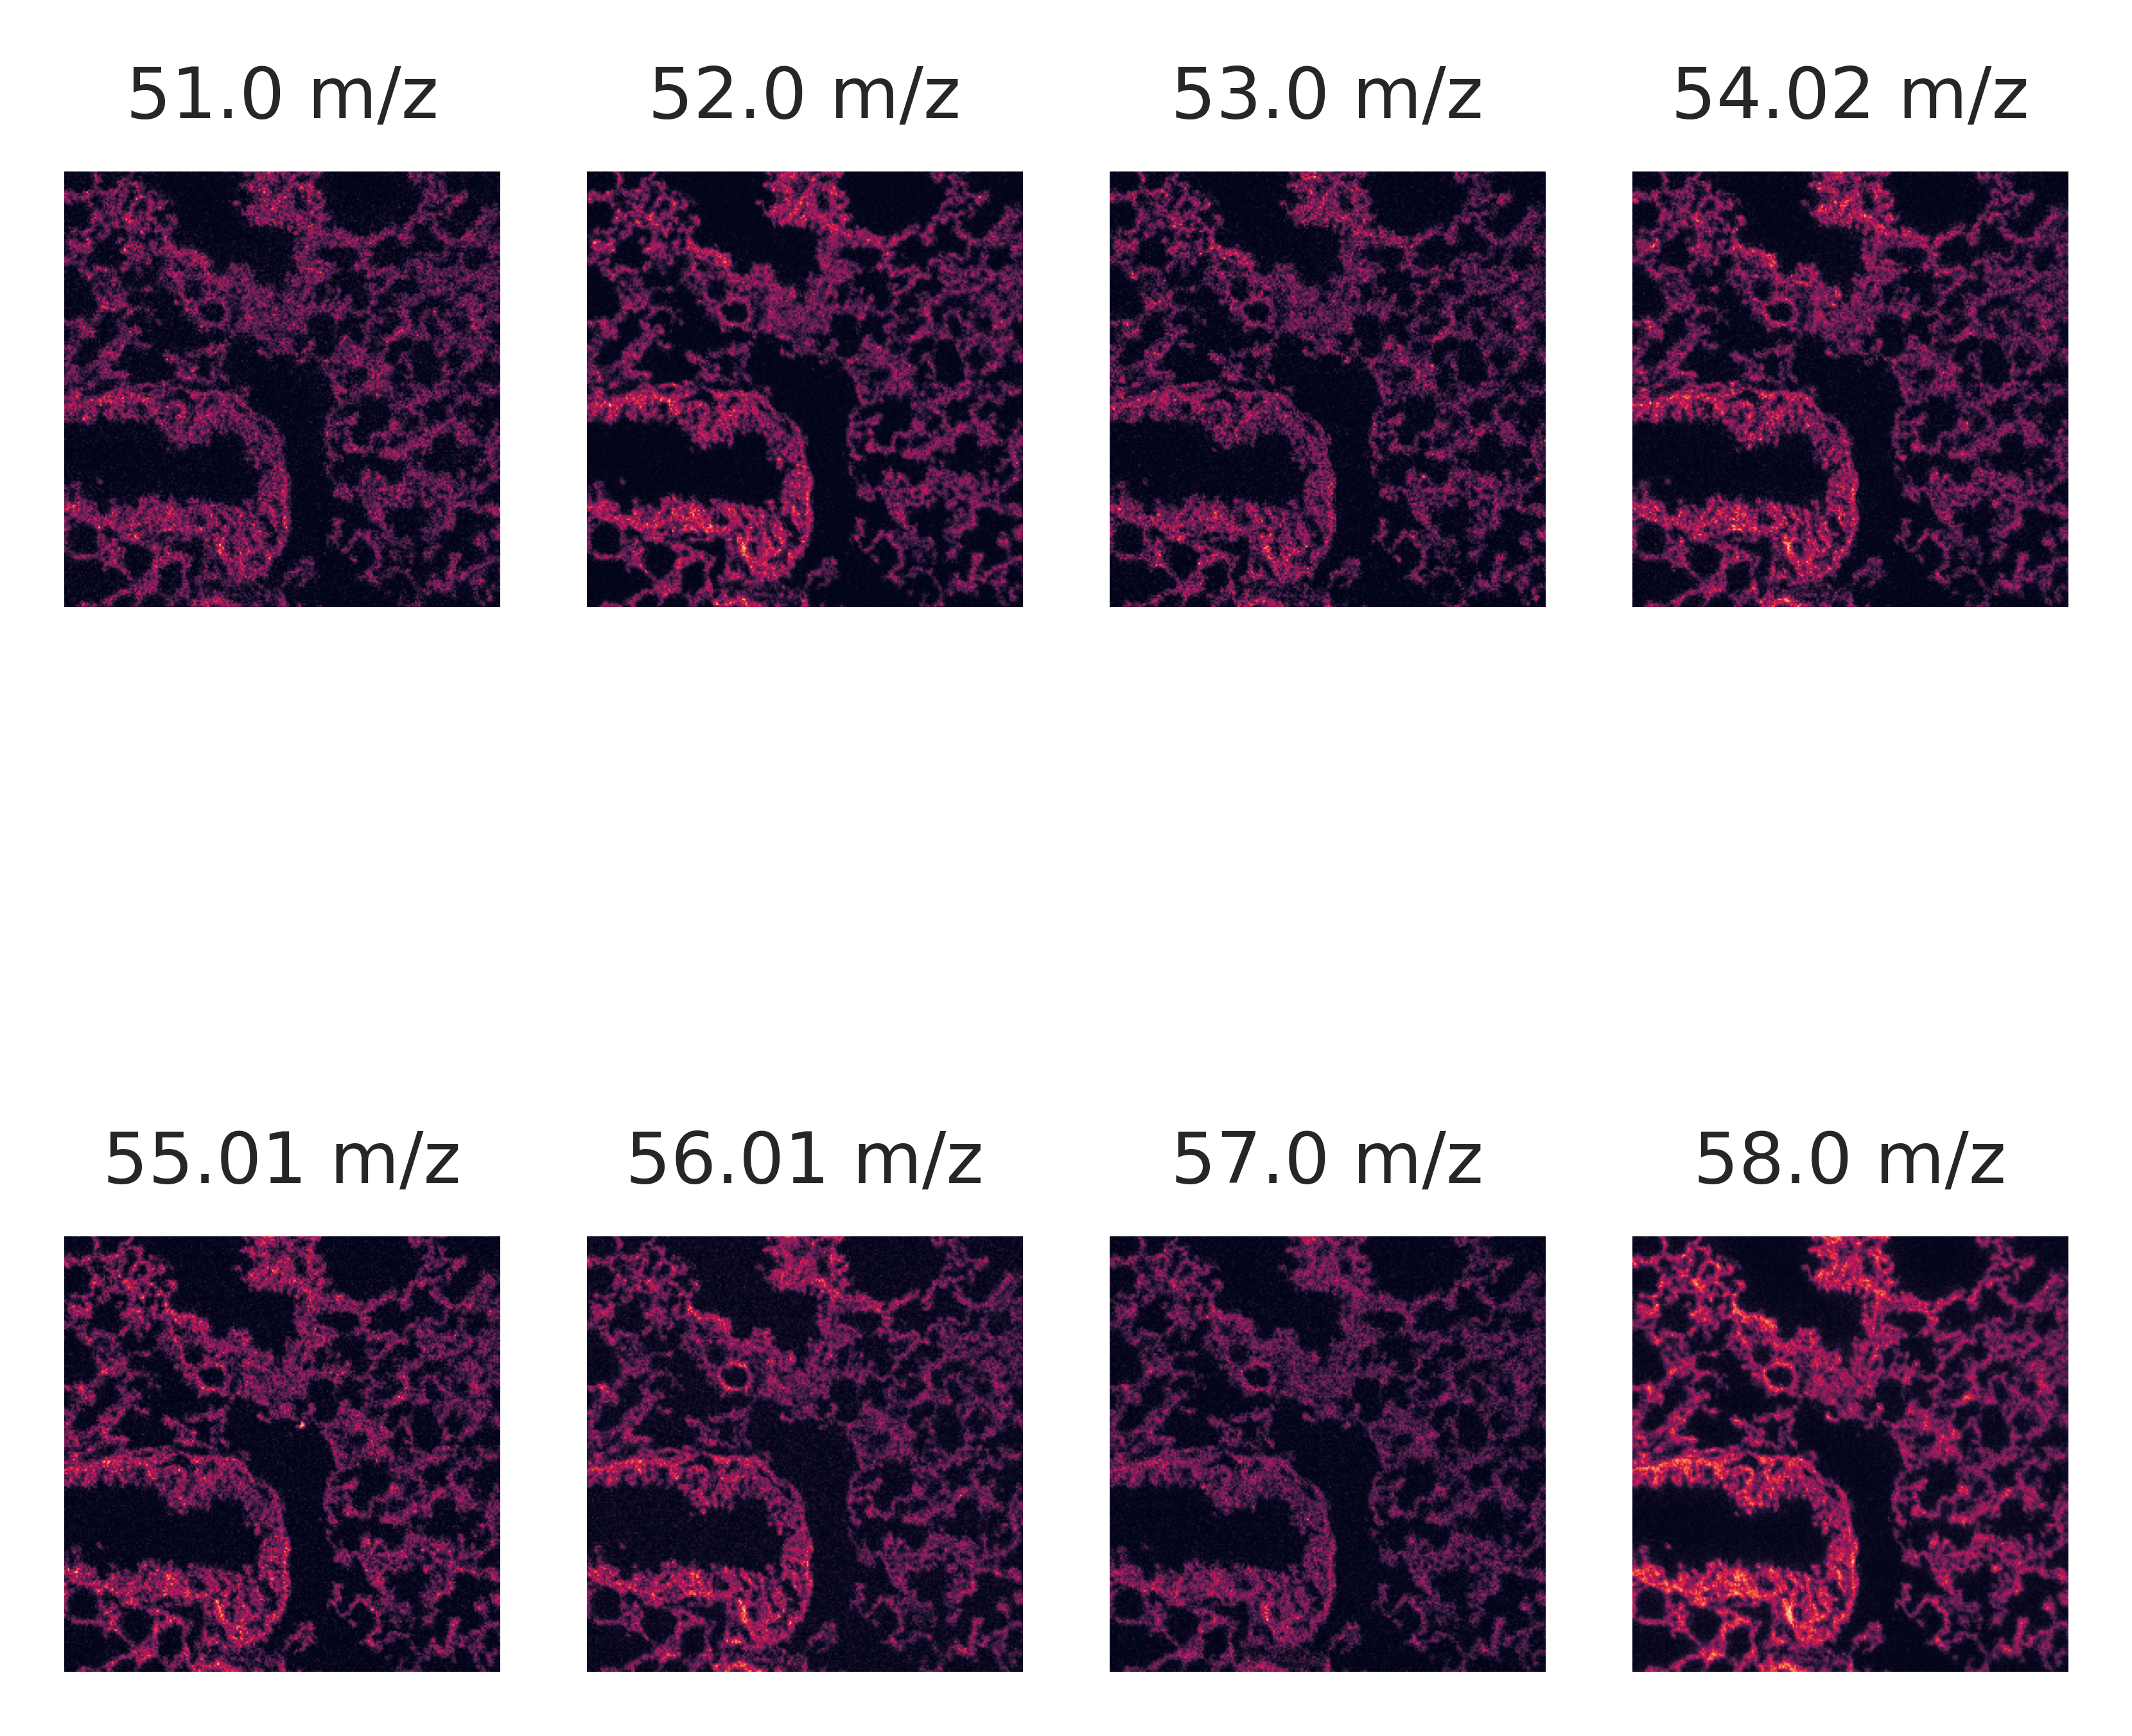

In [4]:
SEAM.pl.IMS(a,list(a.var_names[:8]),n_cols=4)

# View

### run SIMS-View with DR_method=Umap

In [5]:
a = SEAM.tl.View(a,method='Umap')

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/envs/scaden/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/e

### show result of SIMS-View

In [7]:
SEAM.pl.View(a,method='Umap')

# Cut

### get segmented mask and cell position, and write into anndata

In [8]:
a=SEAM.tl.Cut(a)

setting obsm: spatial


## each cell represented as a dot

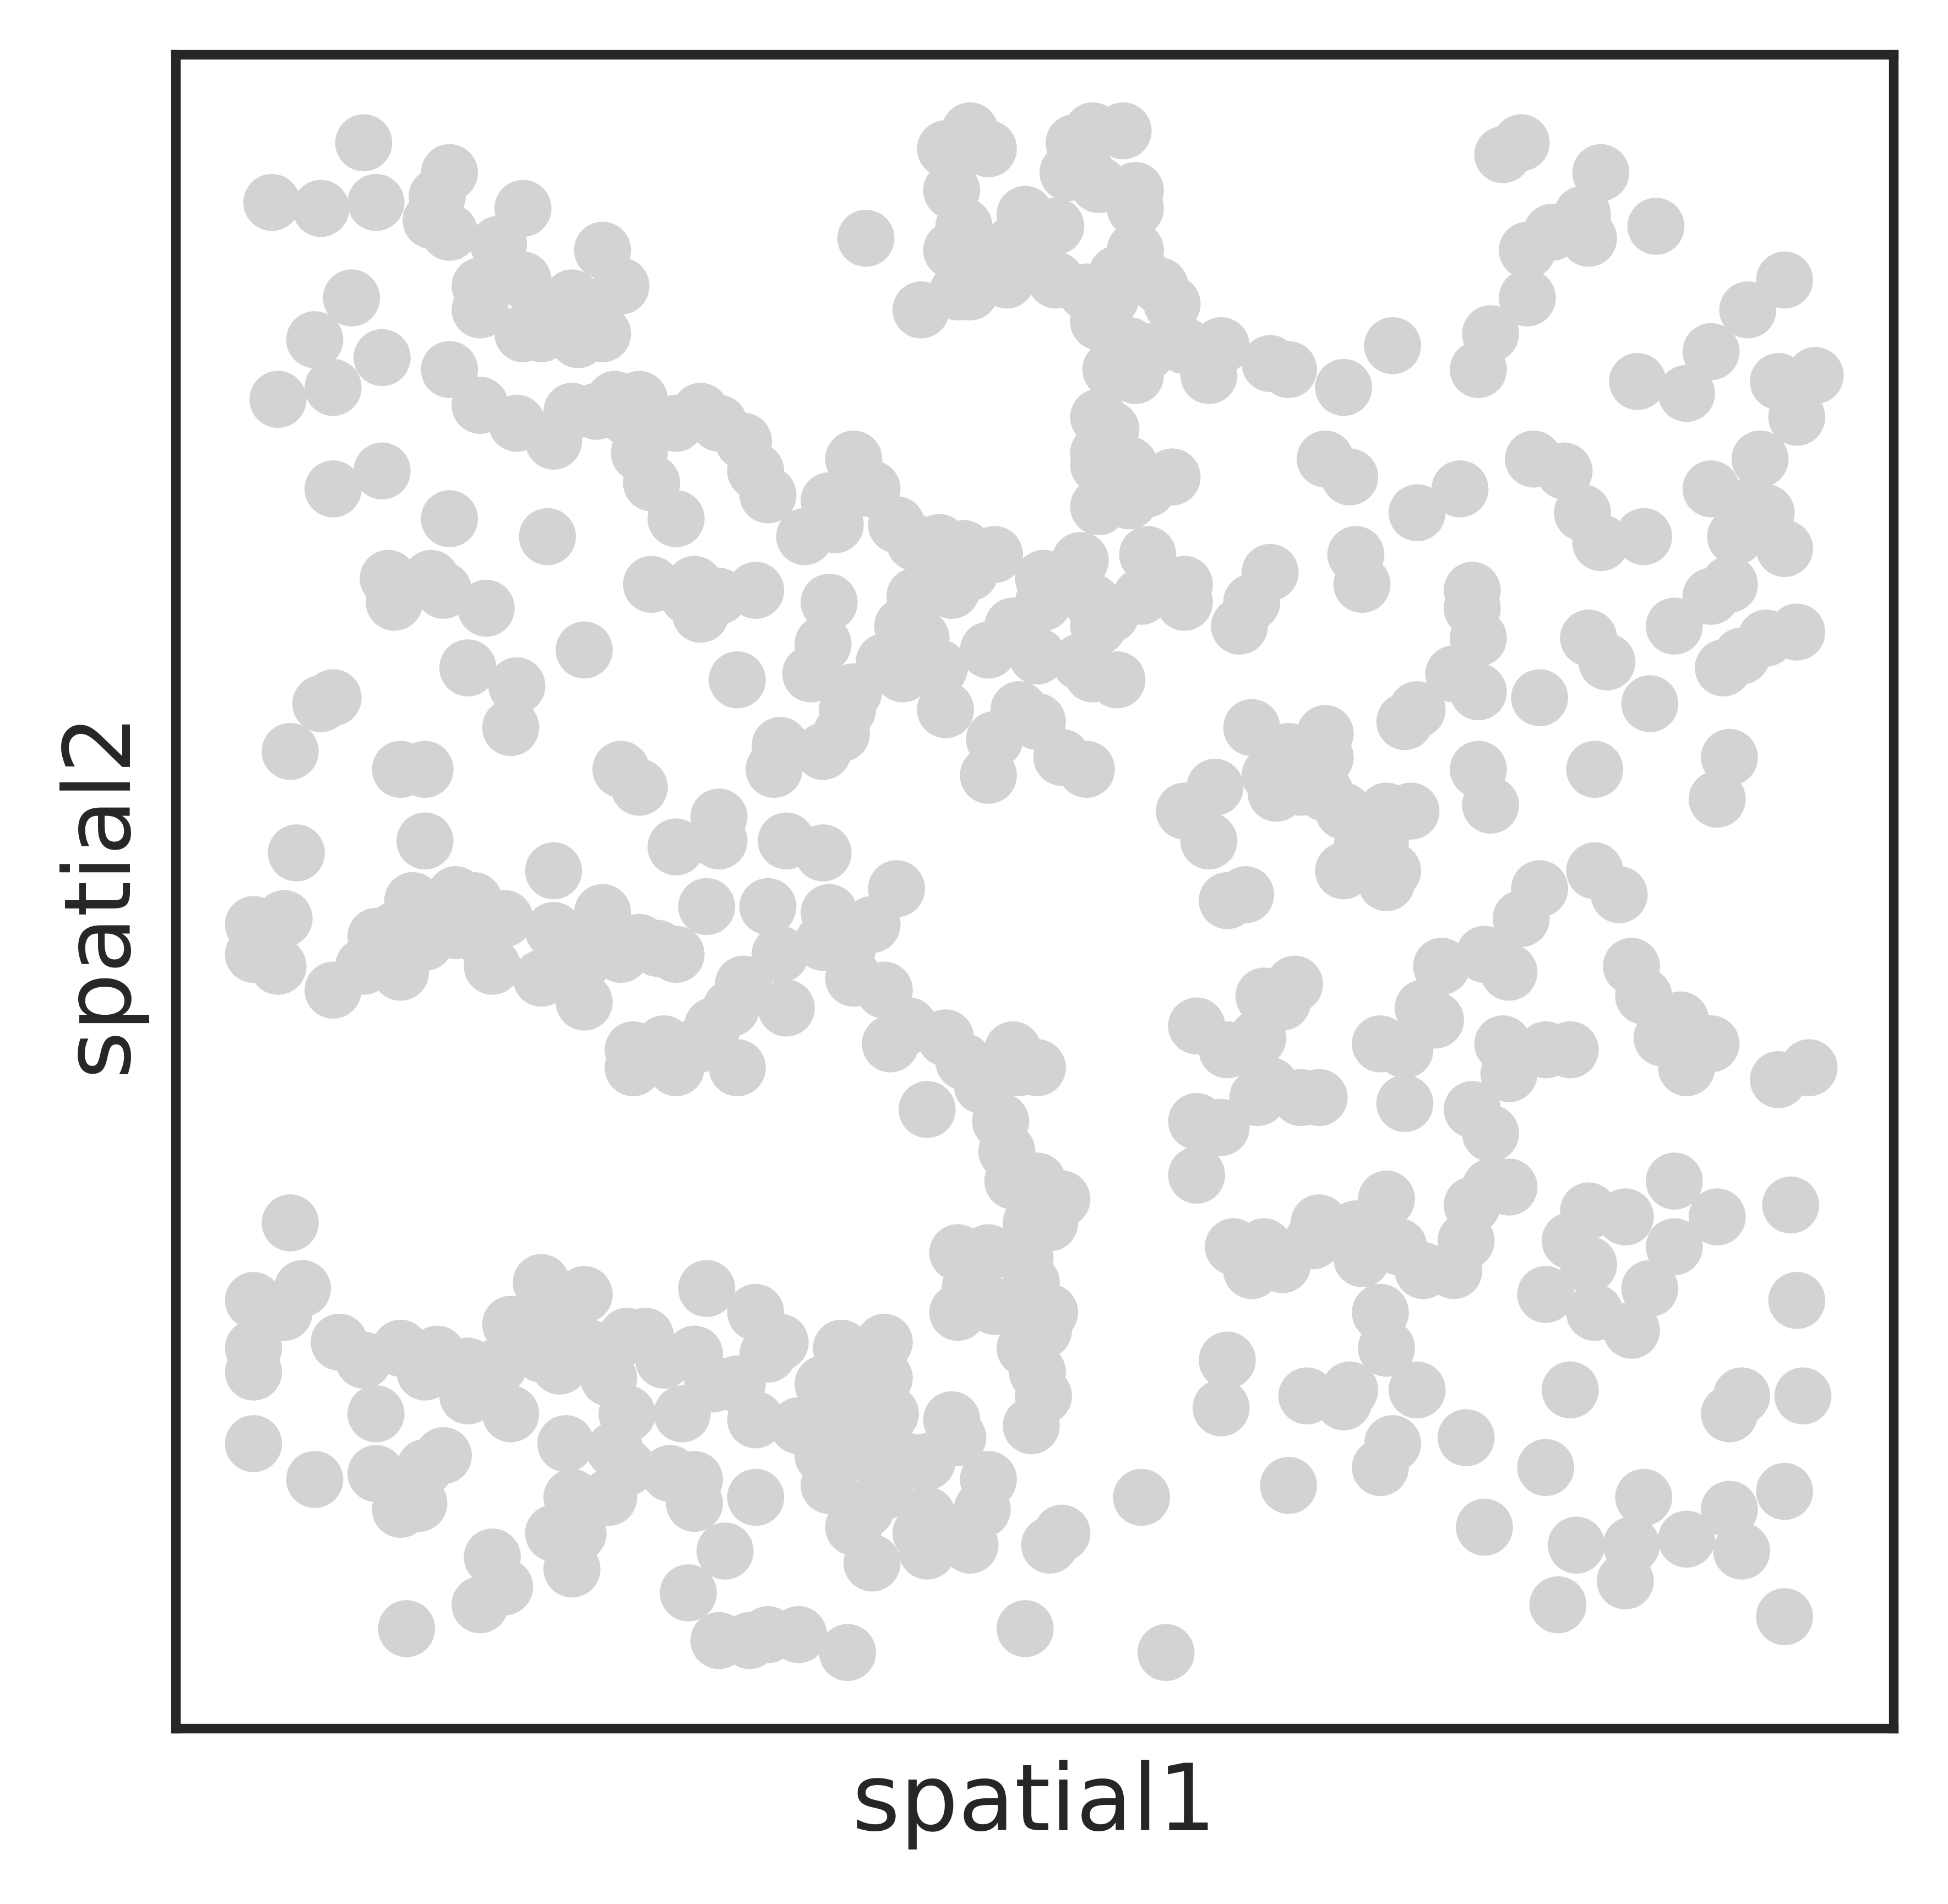

In [9]:
SEAM.pl.Cut(a,method='dot')

## each cell represented as a segmented mask

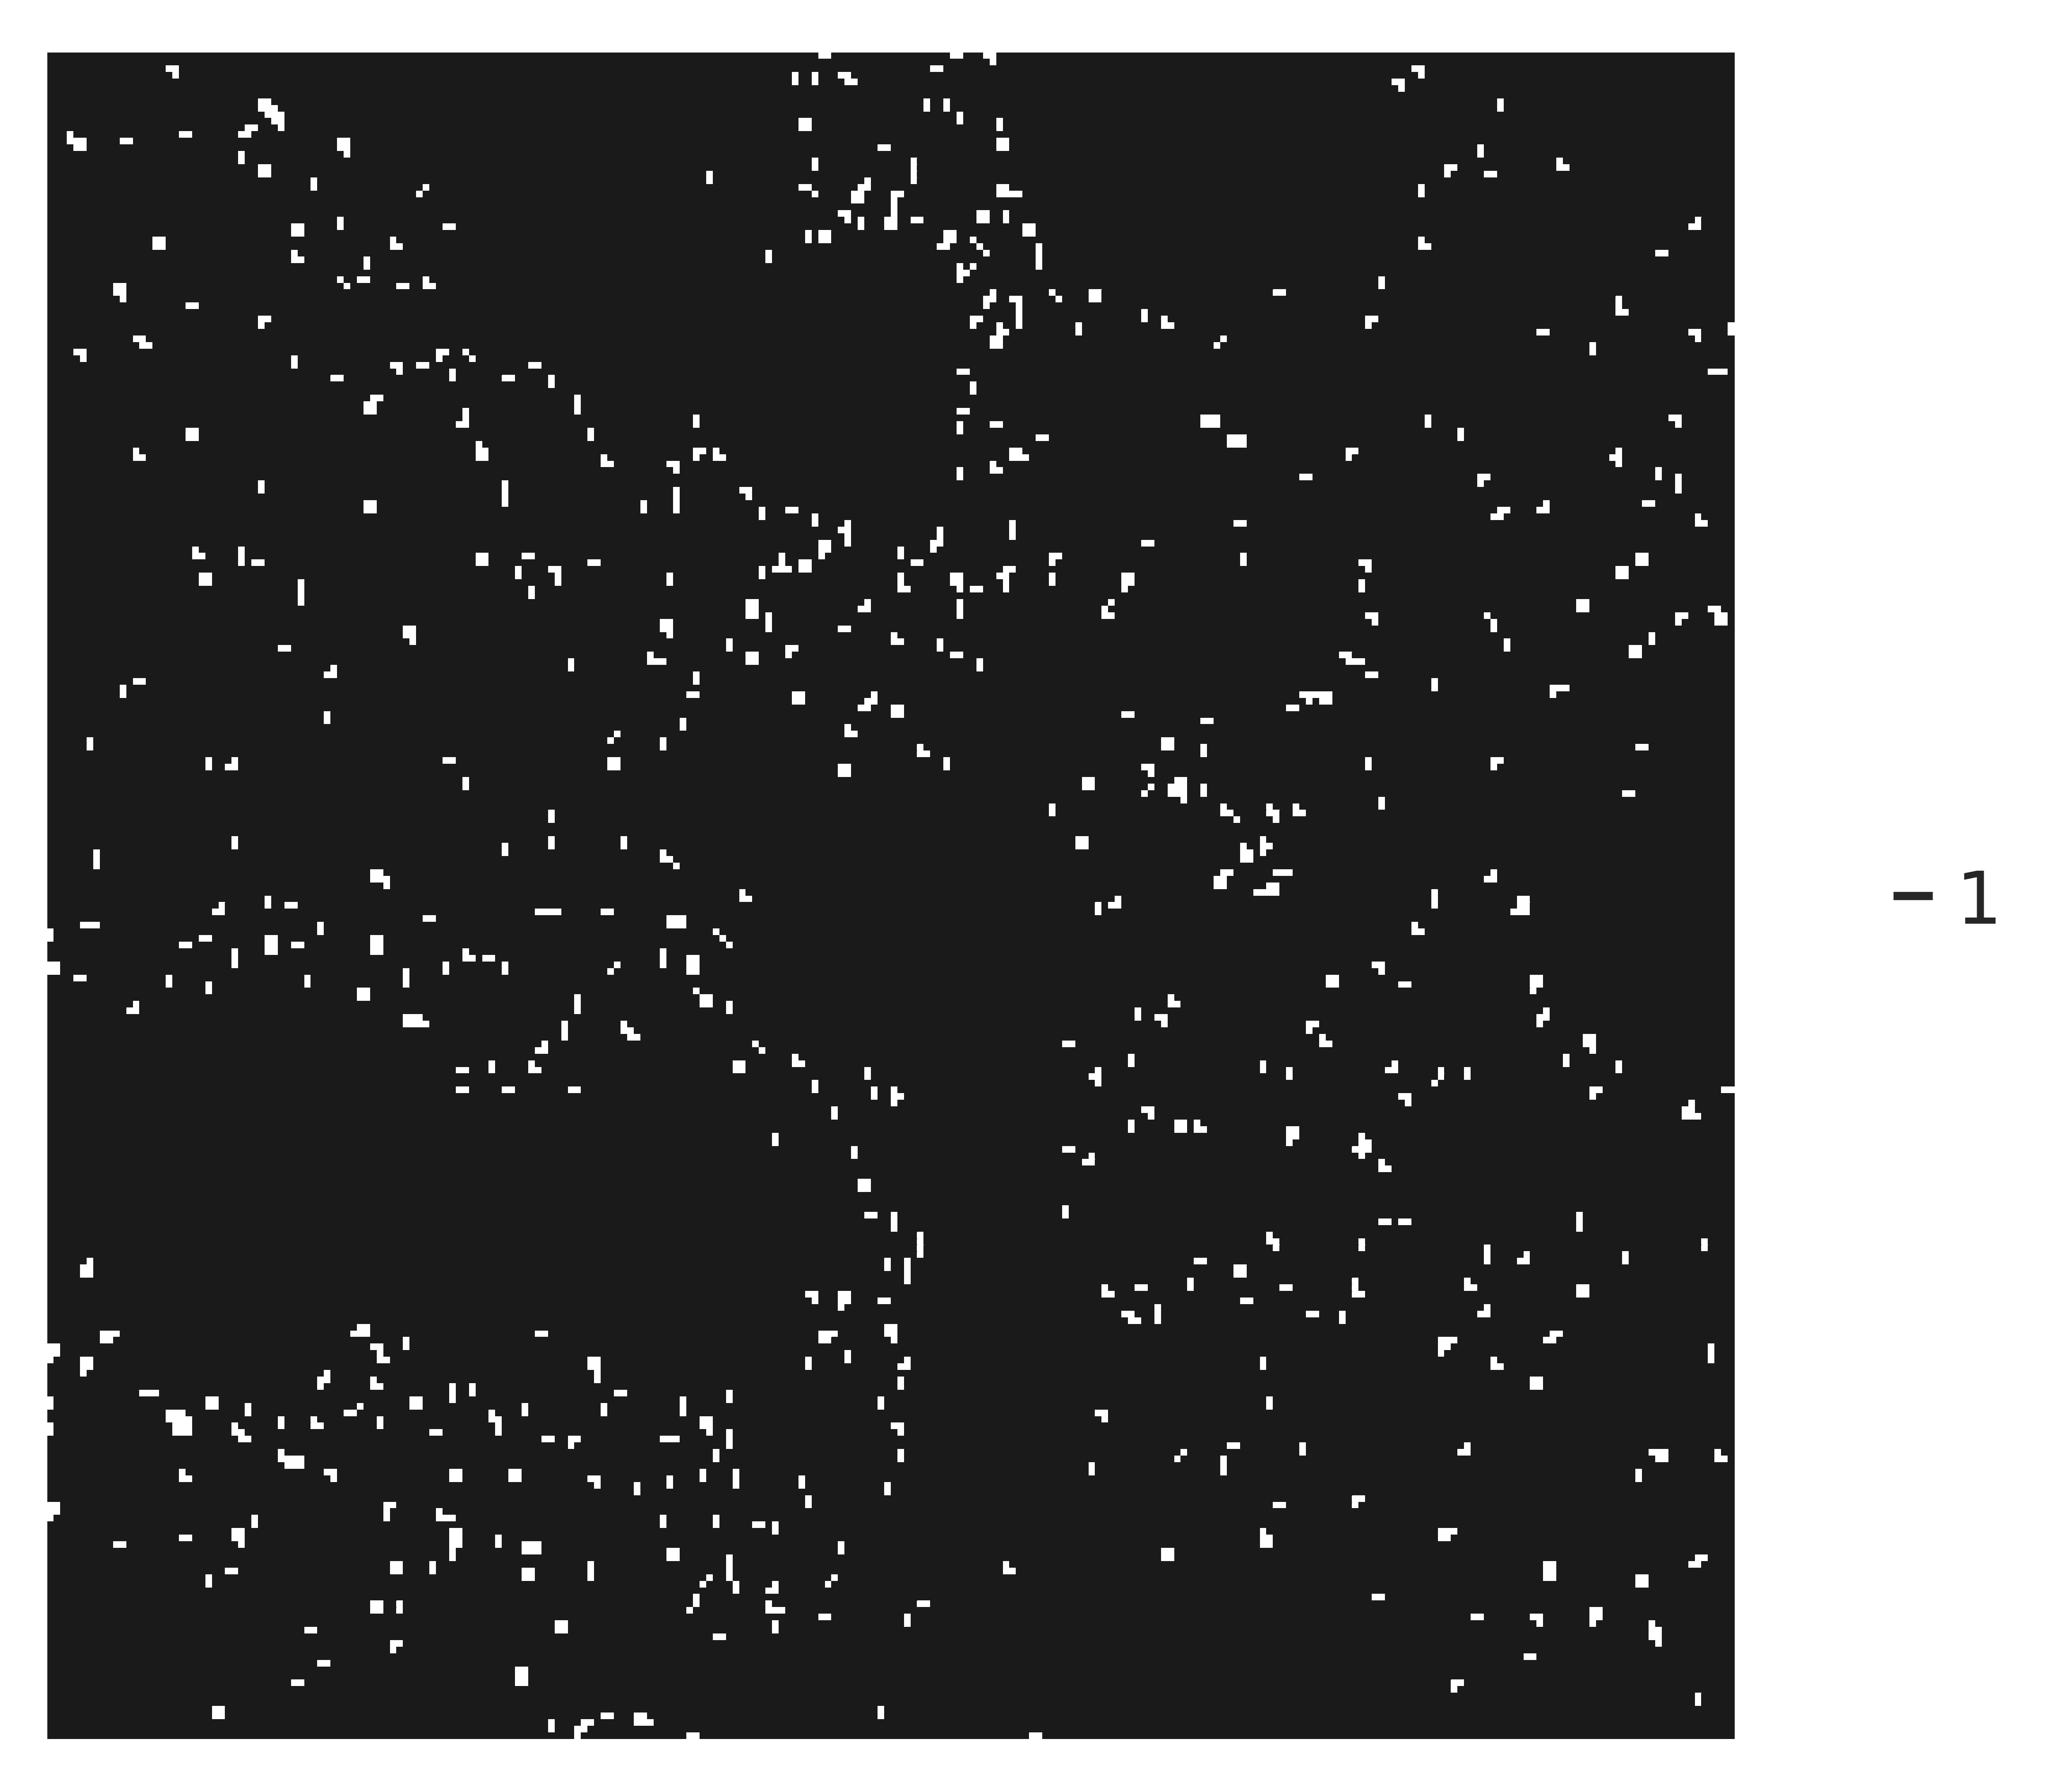

In [11]:
SEAM.pl.Cut(a,method='mask')

# ID&Cluster

### run SIMS-ID with epochs and temperature.

In [20]:
a = SEAM.tl.ID(a,epochs=200,t=5)

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/200
1676/1676 [==============================] - 1s 341us/step - loss: 6.2935 - softmax_loss: 6.2935 - center_loss: 0.1465
Epoch 2/200
1676/1676 [==============================] - 0s 91us/step - loss: 6.2890 - softmax_loss: 6.2886 - center_loss: 0.1432
Epoch 3/200
1676/1676 [==============================] - 0s 93us/step - loss: 6.2768 - softmax_loss: 6.2776 - center_loss: 0.7576
Epoch 4/200
1676/1676 [==============================] - 0s 91us/step - loss: 6.2544 - softmax_loss: 6.2528 - center_loss: 3.5533
Epoch 5/200
1676/1676 [==============================] - 0s 92us/step - loss: 6.2287 - softmax_loss: 6.2335 - center_loss: 2.4910
Epoch 6/200
1676/1676 [==============================] - 0s 93us/step - loss: 6.2235 - softmax_loss: 6.2235 - center_loss: 4.1243
Epoch 7/200
1676/1676 [==============================] - 0s 89us/step - loss: 6.2158 - softmax_loss: 6.2130 - center_loss: 2.8595
Epoch 8/200
1676/1676 [==============================] - 0s 108us/step - loss: 6.2099 - s

### dump intermediate results

In [21]:
a.write_h5ad('../../data/demo_dump/ID.h5ad')

### run Cluster methods with cell representation method of SIMS-ID

In [22]:
a = SEAM.tl.Cluster(a,method='SIMLR',cluster_param=3,rep='ID')

(540, 1676) 3
SIMLR highly recommends you to perform PCA first on the data

Please use the in-line function fast_pca on your input



/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/SIMLR/core.py:70: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = AnnoyIndex(d)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/SIMLR/core.py:75: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  u = AnnoyIndex(d)


Successfully Run SIMLR! SIMLR took 0.456824 seconds in total

done!


### umap embedding with cell representation method of SIMS-ID

In [23]:
a = SEAM.tl.Umap(a,rep='ID')

computing neighbors
    finished (0:00:00)
computing UMAP
    finished (0:00:01)
Sucessfully run Umap!


### Umap embedding colored coded by SIMLR result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


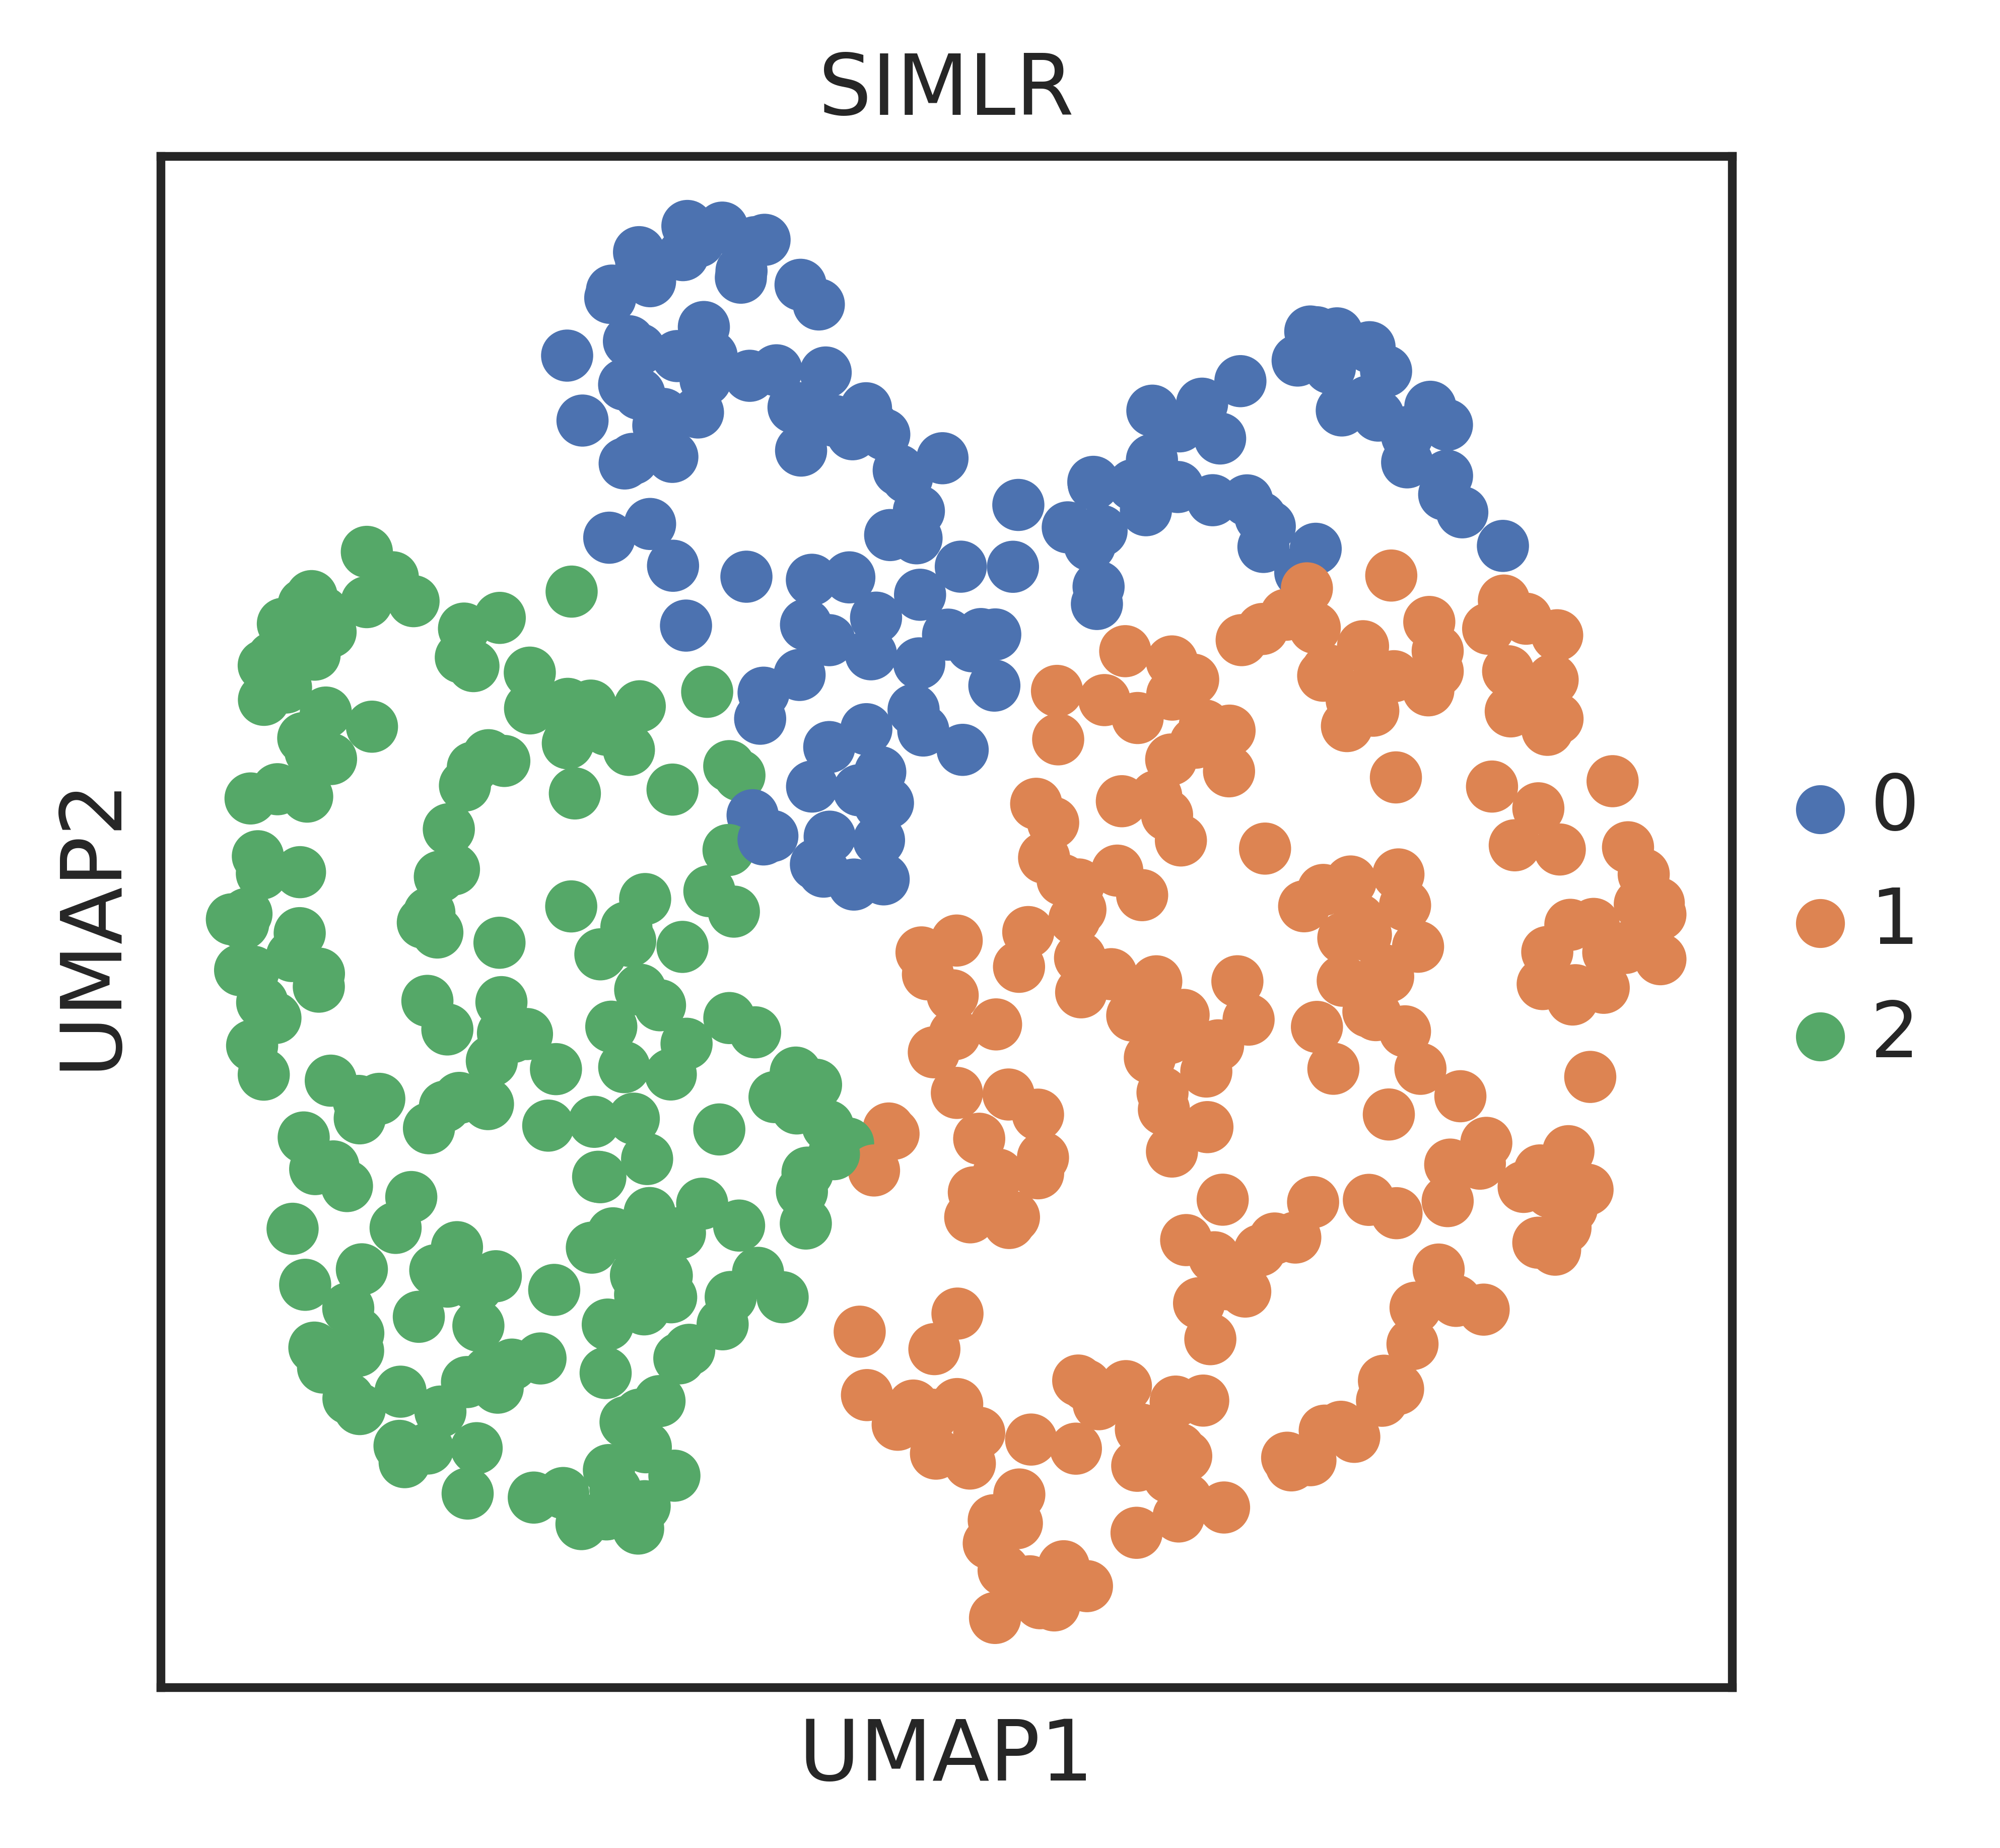

In [24]:
SEAM.pl.ID(a)

### spatial single cell map colored by SIMLR

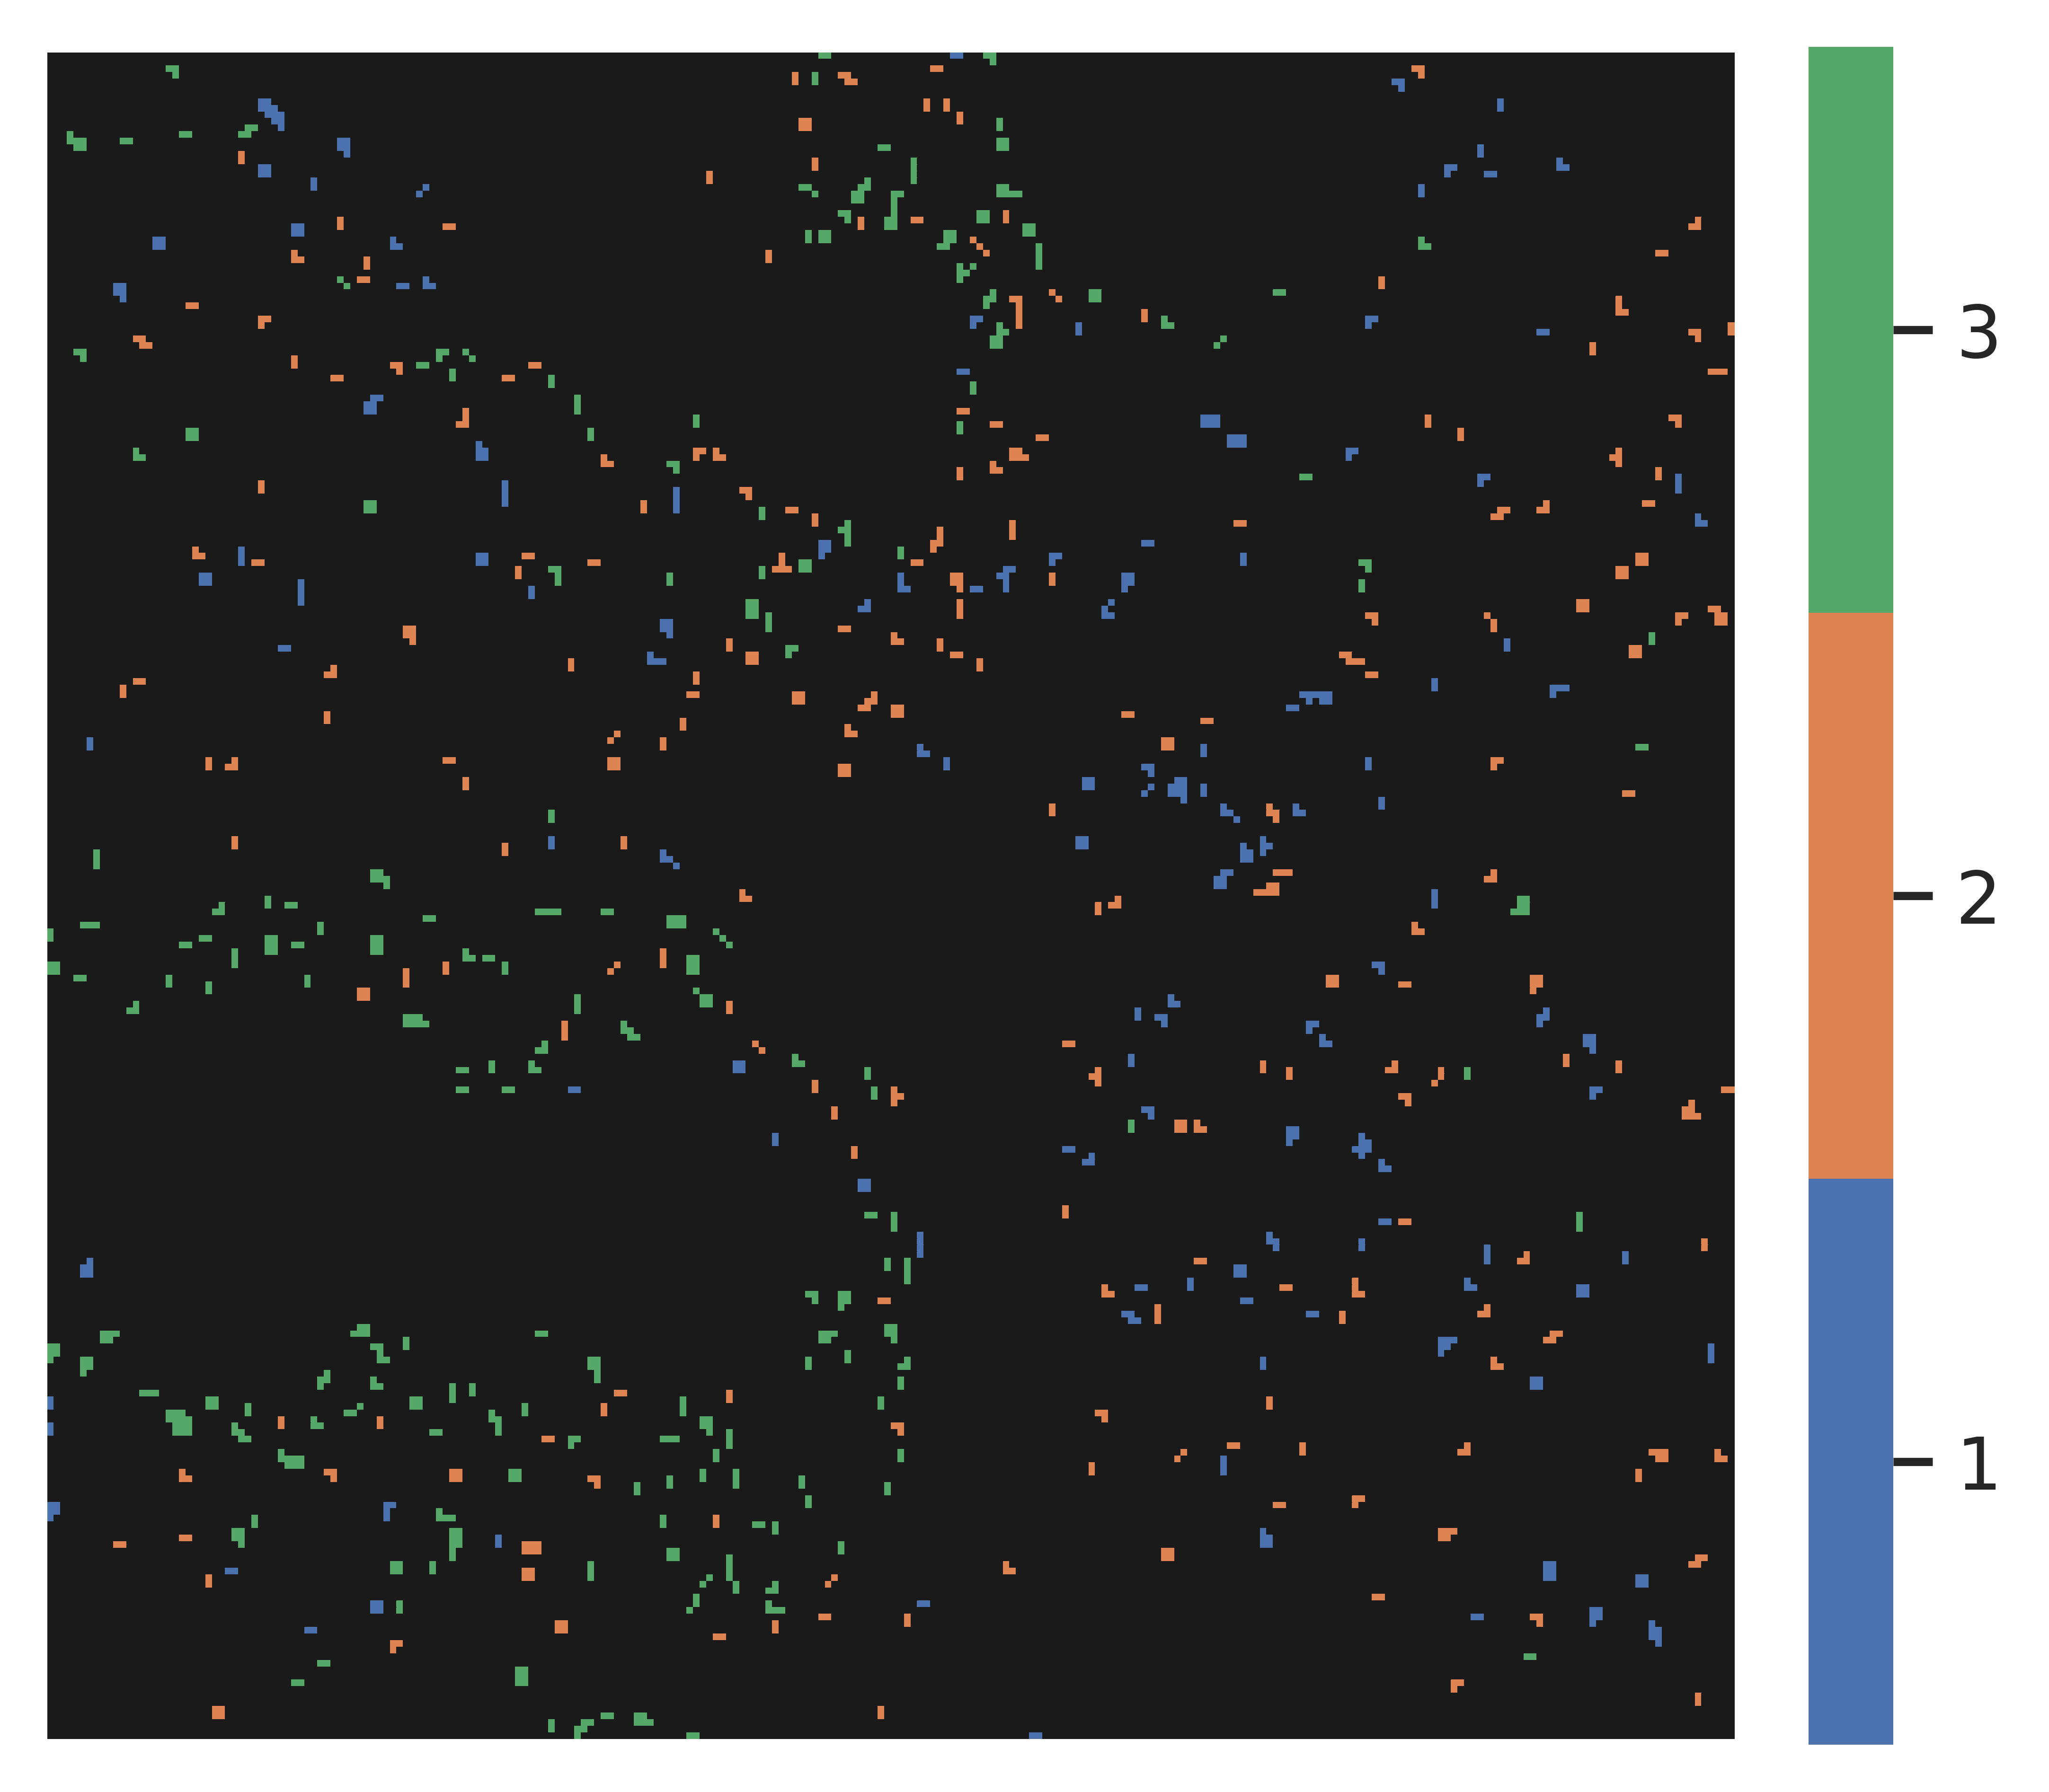

In [27]:
SEAM.pl.Cluster(a,cls='SIMLR',groups=range(3),method='mask')

### spatial single cell map of particular clusters 

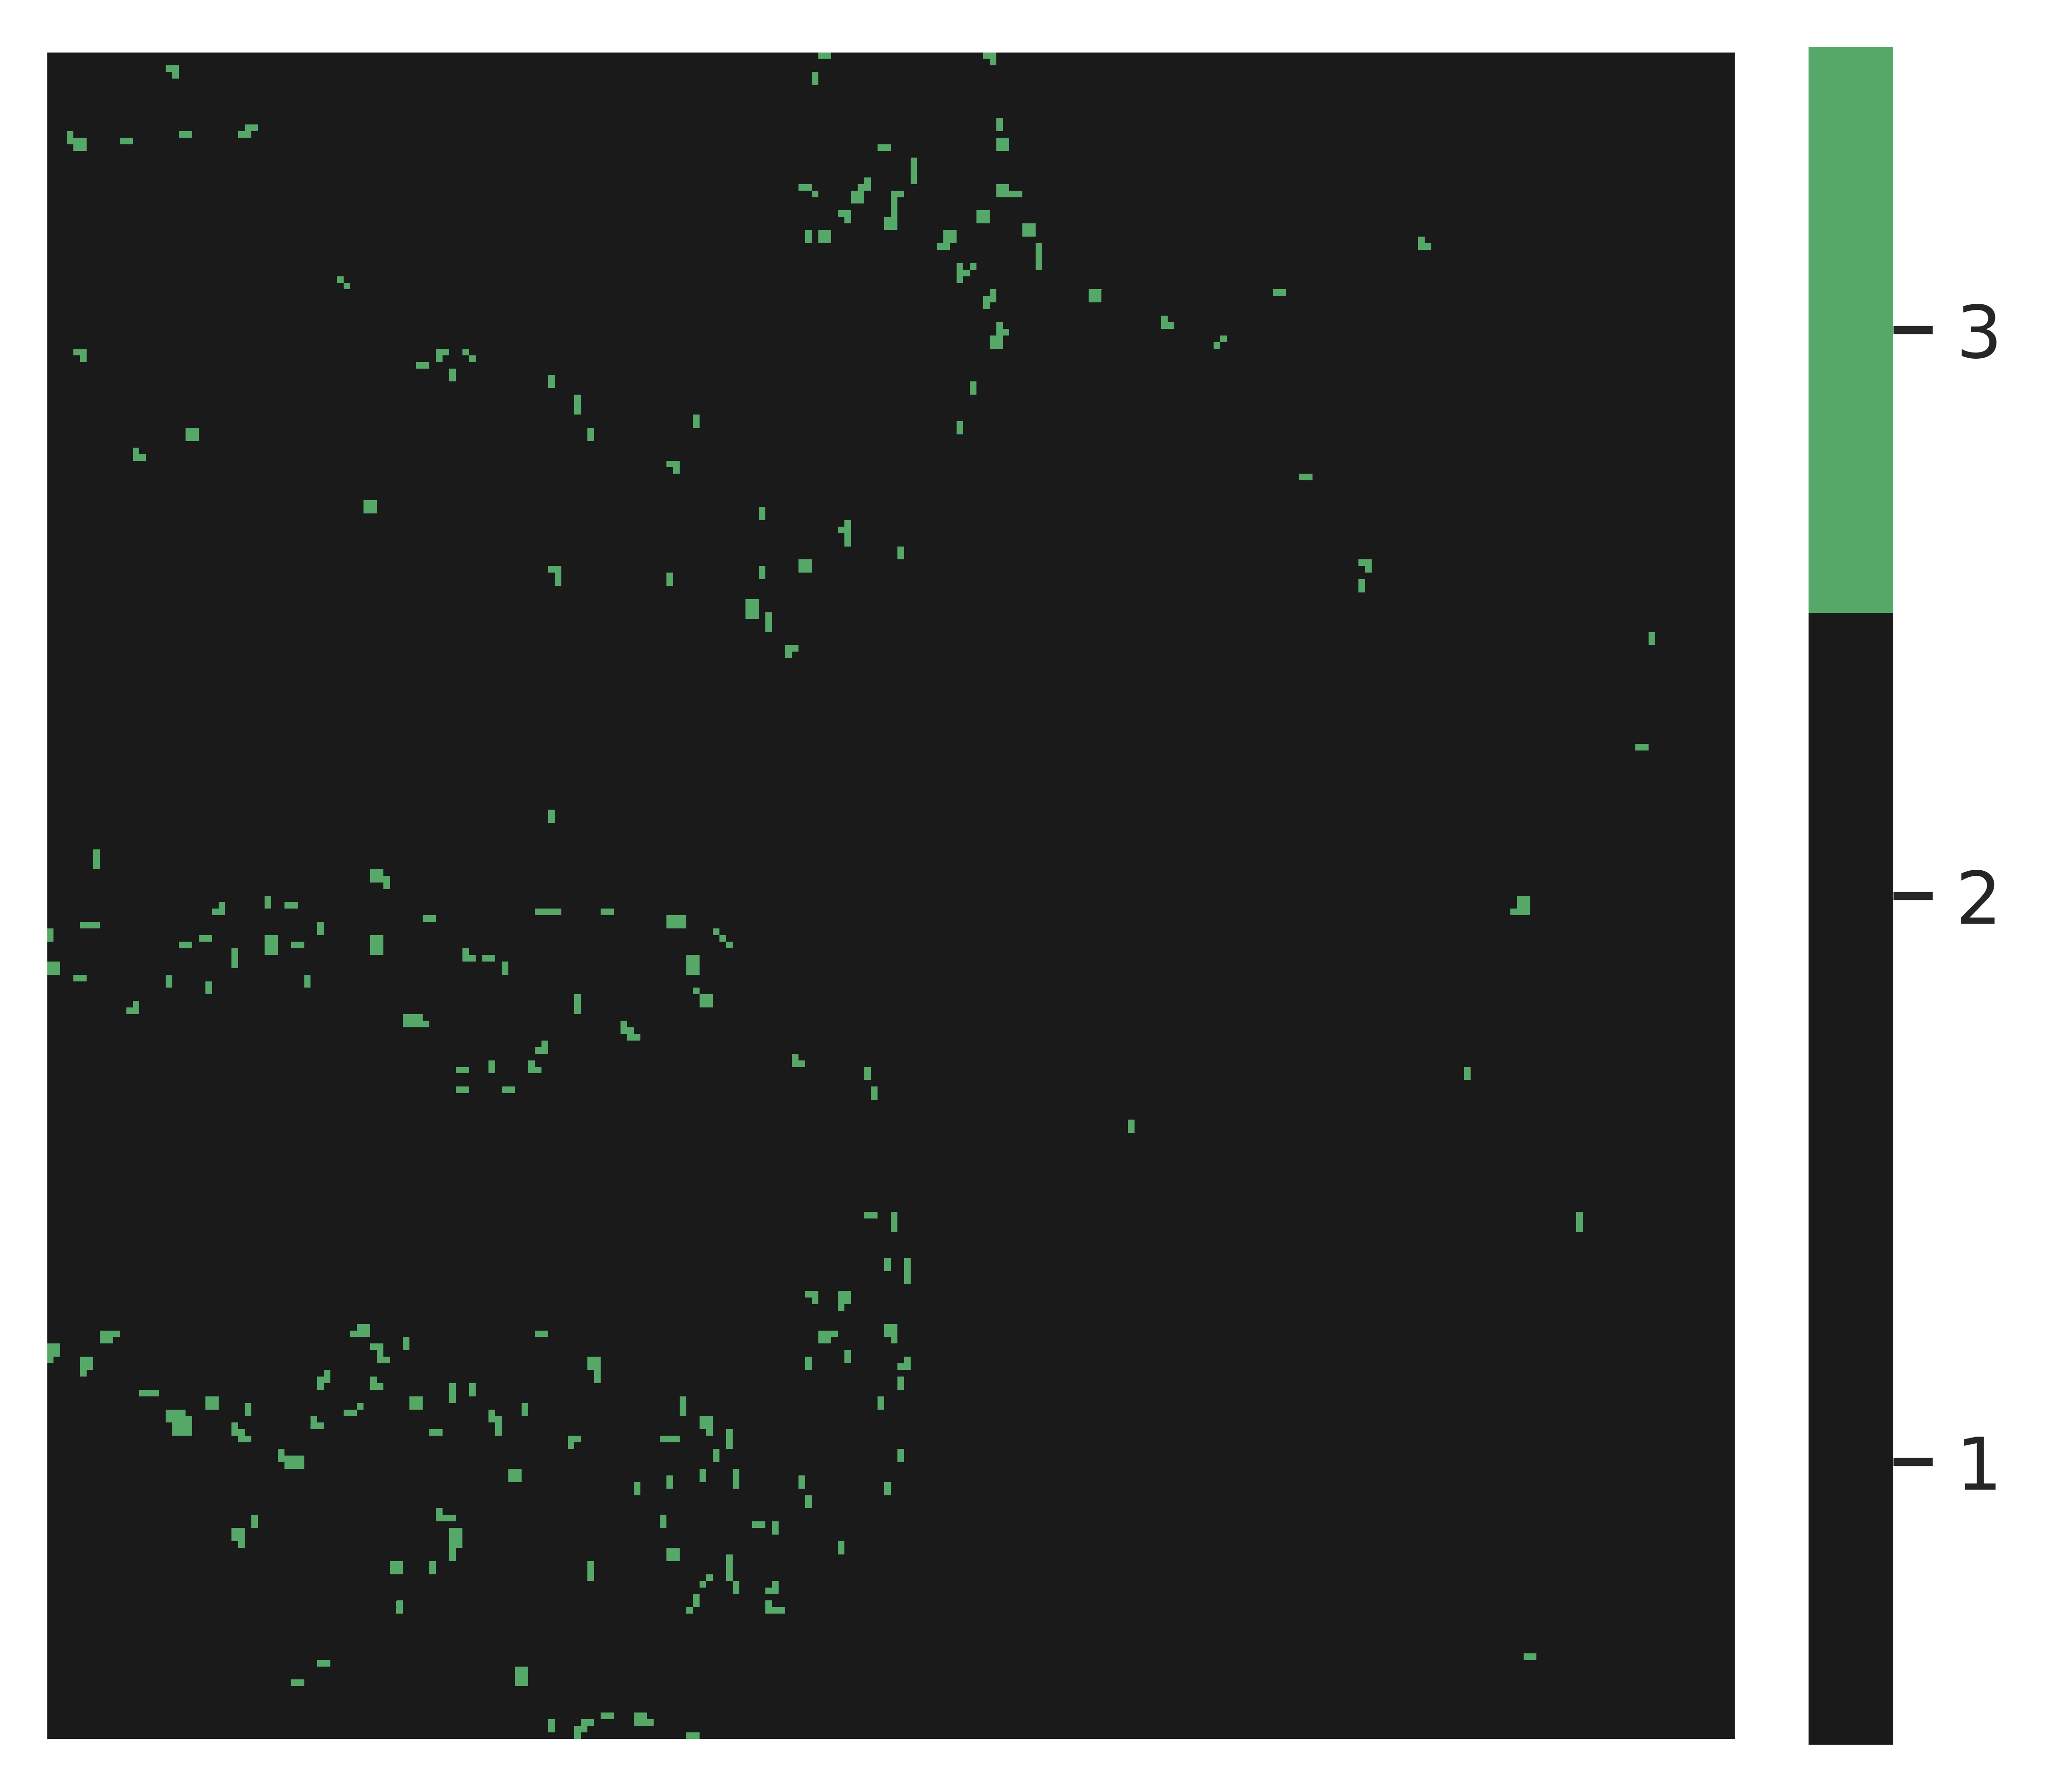

In [29]:
SEAM.pl.Cluster(a,cls='SIMLR',groups=[2],method='mask')